In [1]:
import pandas as pd
#Create dataset
Weather_dataset = {
    'weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Rainy', 'Overcast', 'Overcast'], 
    'temperature' : ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 
                    'Mild', 'Mild'],
    'play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes']
}
Weather_dataset = pd.DataFrame(Weather_dataset)
display(Weather_dataset)

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Rainy,Cool,Yes
9,Overcast,Mild,Yes


In [2]:
#Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
labelEncoder = preprocessing.LabelEncoder()

#Converting string labels into numbers
encoded_weather = labelEncoder.fit_transform(Weather_dataset.weather)
encoded_temperature = labelEncoder.fit_transform(Weather_dataset.temperature)
target = labelEncoder.fit_transform(Weather_dataset.play)

#print data
encoded_weather, encoded_temperature, target

(array([2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0]),
 array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]))

In [3]:
#encoded features are then combined
features = [list(i) for i in zip(encoded_weather, encoded_temperature)]

In [4]:
#generate a model using naive bayes classifier
#Import Categorical Naive Bayes model
from sklearn.naive_bayes import CategoricalNB

#Create the model
model = CategoricalNB()

#Train the model
model.fit(features, target)

CategoricalNB()

In [5]:
#Predict Output(sunny and hot)
predicted = model.predict([[0,1]])
print("Can i play ?", labelEncoder.inverse_transform(predicted))

Can i play ? ['Yes']


In [19]:
#Exercice 1
#1)
import pandas as pd
import numpy as np
df = pd.read_csv('./data/transfusion.csv', delimiter=",")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [20]:
df = df.rename(columns={"Recency (months)": "Recency", "Frequency (times)": "Frequency", "Monetary (c.c. blood)":"Monetary", "Time (months)":"Time", "whether he/she donated blood in March 2007":"Target"})

In [21]:
df.Target.value_counts()

0    570
1    178
Name: Target, dtype: int64

In [22]:
df[df.Target == 1]

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
6,2,7,1750,14,1
...,...,...,...,...,...
680,20,14,3500,69,1
695,17,7,1750,58,1
708,11,2,500,38,1
712,14,2,500,35,1


In [25]:
cond0 = df.Target == 0
cond1 = df.Target == 1
df.loc[cond0, "Target"] = "Not Donated"
df.loc[cond1, "Target"] = "Donated"

In [26]:
df.head()

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,Donated
1,0,13,3250,28,Donated
2,1,16,4000,35,Donated
3,2,20,5000,45,Donated
4,1,24,6000,77,Not Donated


In [27]:
df.isna().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Recency    748 non-null    int64 
 1   Frequency  748 non-null    int64 
 2   Monetary   748 non-null    int64 
 3   Time       748 non-null    int64 
 4   Target     748 non-null    object
dtypes: int64(4), object(1)
memory usage: 29.3+ KB


In [28]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [29]:
from sklearn.naive_bayes import CategoricalNB

#Create the model
model = CategoricalNB()

#Train the model
model.fit(X, y)

CategoricalNB()

In [30]:
#3) #Predict Output(1 for donated or 0 for not donated)
predicted1 = model.predict([[0, 50, 1000, 28]])
print("Person 1 : Can i give my blood?", predicted1)

predicted2 = model.predict([[4, 10, 4000, 64]])
print("Person 2 : Can i give my blood?", predicted2)

Person 1 : Can i give my blood? ['Donated']
Person 2 : Can i give my blood? ['Not Donated']


C:\Users\kwass\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
C:\Users\kwass\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [116]:
#Exercice 2
import pandas as pd
import numpy as np
performance_df = pd.read_csv('./data/studentsPerformance.csv', delimiter=";")
performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [105]:
performance_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [106]:
performance_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [152]:
performance_df['Total marks']=performance_df['math score']+performance_df['reading score']+performance_df['writing score']

In [154]:
X = performance_df.drop(labels=["math score", "reading score", "writing score", 'Total marks'], axis=1)
math_y = performance_df["math score"]
reading_y = performance_df["reading score"]
writing_y = performance_df["writing score"]

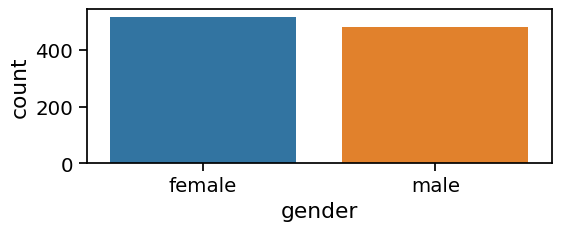

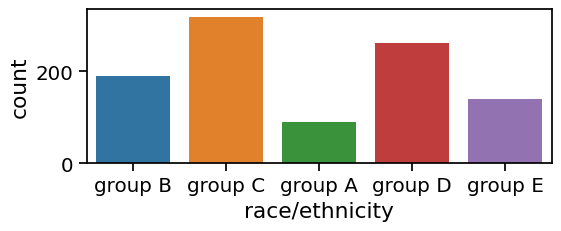

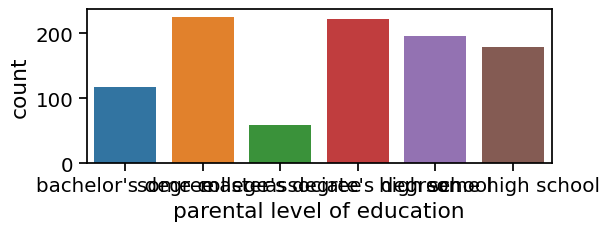

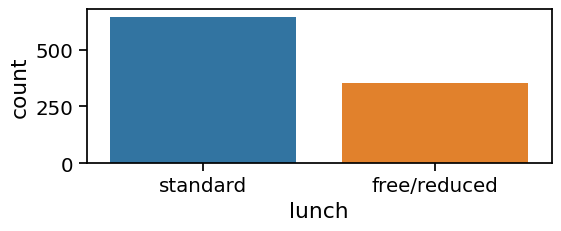

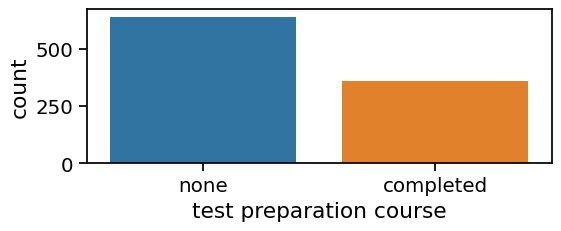

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

for item in X.columns:
    plt.figure(figsize=(6,2))
    sns.countplot(x=performance_df[item])
    plt.show()
    print('\n')

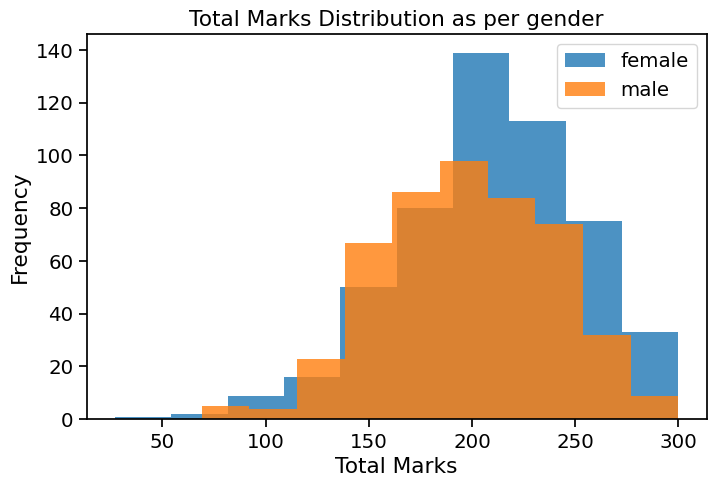

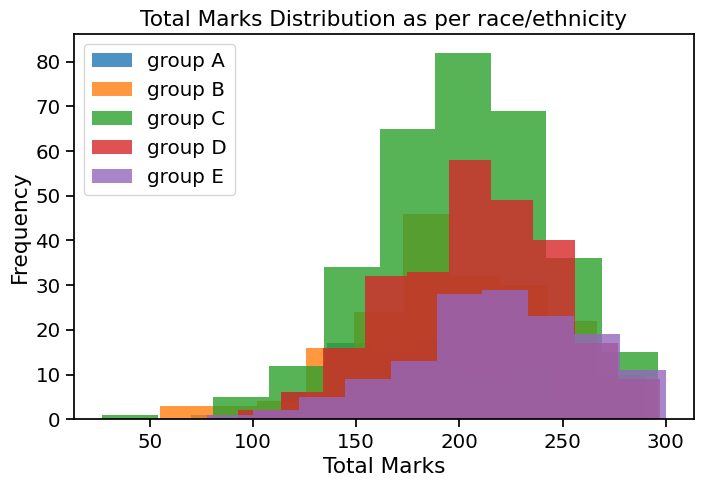

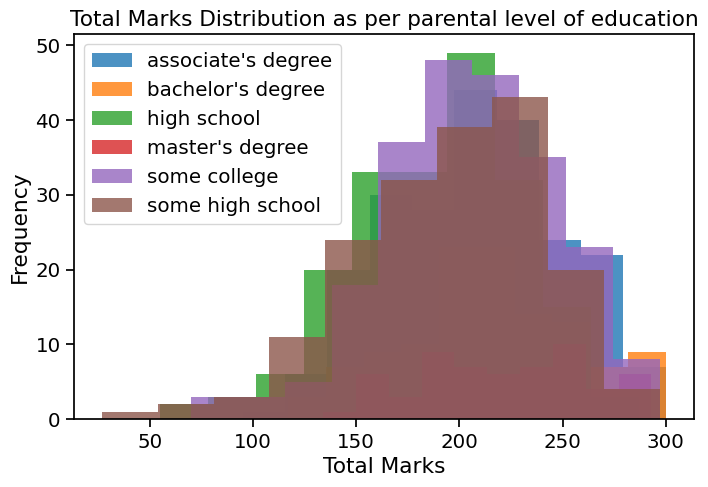

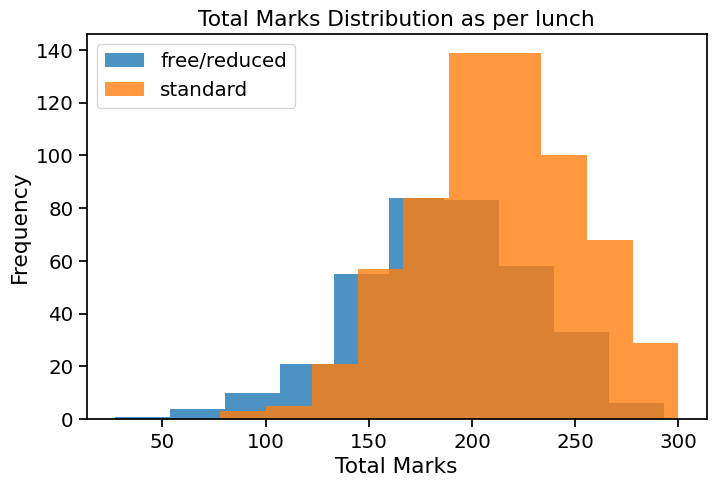

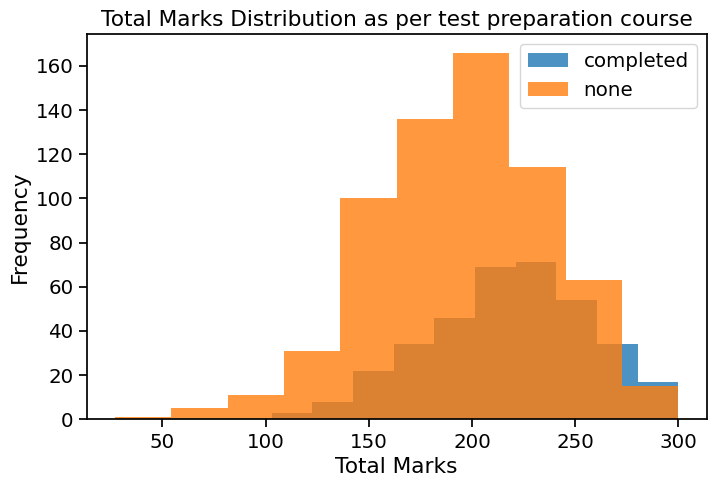

In [164]:
for x in performance_df.columns[:5]:
    plt.figure(figsize=(8,5))
    performance_df.groupby(x)['Total marks'].plot.hist(alpha=0.8)
    plt.xlabel("Total Marks")
    plt.title("Total Marks Distribution as per {one}".format(one=x))
    plt.legend()

In [165]:
transformed_X = pd.get_dummies(X)
transformed_X.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, performance_df['Total marks'], test_size=0.2)

## Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [168]:
y_preds = LR.predict(X_test)

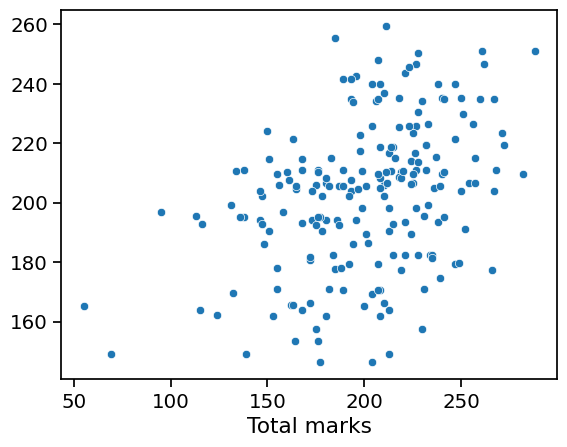

In [169]:
sns.scatterplot(x=y_test, y=y_preds);

In [171]:
LR.score(X_test, y_test)

0.08253225596461367

In [170]:
from sklearn import metrics 

print('The Mean absolute error:', metrics.mean_absolute_error(y_test, y_preds))
print('The mean squared error:', metrics.mean_squared_error(y_test, y_preds))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

The Mean absolute error: 29.93
The mean squared error: 1391.76875
The root mean squared error: 37.30641700833785


In [55]:
#LDA
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

In [56]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X,y).transform(X)
target_names = iris.target_names

************** LDA Summary ***************
Classes:  [0 1 2]
Priors:  [0.33333333 0.33333333 0.33333333]
Explained variance ratio:  [0.9912126 0.0087874]


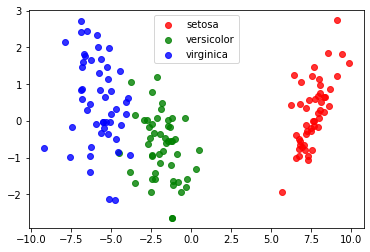

In [60]:
import matplotlib.pyplot as plt
#After LDA transformation , we plot the new dataset
#create LDA plot
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(data_plot[y == i,0], data_plot[y == i, 1], alpha=.8,
               color = color, label=target_name)
    
#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

print('************** LDA Summary ***************')
print('Classes: ', model.classes_)
print('Priors: ', model.priors_)
print('Explained variance ratio: ', model.explained_variance_ratio_)

#display LDA plot
plt.show()

In [80]:
#Exercise
df = pd.read_csv('./data/Challenger_Ranked_Games.csv')
df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [81]:
df = df.rename(columns={"gameDuraton": "gameDuration"})

In [82]:
df.columns

Index(['gameId', 'gameDuration', 'blueWins', 'blueFirstBlood',
       'blueFirstTower', 'blueFirstBaron', 'blueFirstDragon',
       'blueFirstInhibitor', 'blueDragonKills', 'blueBaronKills',
       'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced',
       'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist',
       'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills',
       'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills',
       'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt', 'redWins',
       'redFirstBlood', 'redFirstTower', 'redFirstBaron', 'redFirstDragon',
       'redFirstInhibitor', 'redDragonKills', 'redBaronKills', 'redTowerKills',
       'redInhibitorKills', 'redWardPlaced', 'redWardkills', 'redKills',
       'redDeath', 'redAssist', 'redChampionDamageDealt', 'redTotalGold',
       'redTotalMinionKills', 'redTotalLevel', 'redAvgLevel',
       'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal',
       'redObjectDamageDealt

In [83]:
#1)having first blood effect on winning game
#test with blue team
df_blue = df.loc[:,['blueWins', 'blueFirstBlood','blueFirstTower', 'blueFirstBaron', 'blueFirstDragon',
                    'blueFirstInhibitor', 'blueDragonKills', 'blueBaronKills','blueTowerKills',
                    'blueInhibitorKills', 'blueWardPlaced','blueWardkills', 'blueKills', 'blueDeath',
                    'blueAssist','blueChampionDamageDealt', 'blueTotalGold', 
                    'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills',
                    'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt']]
df_blue.shape

(26904, 24)

In [84]:
y_blue = df_blue['blueWins']
X_blue = df_blue.drop(['blueWins'], axis=1)

In [85]:
from sklearn.ensemble import RandomForestClassifier

#calcule MAD
model = RandomForestClassifier(n_estimators=340)

model.fit(X_blue, y_blue)

importances = model.feature_importances_

finalblue_df = pd.DataFrame({"Features": X_blue.columns, 
                         "Importances":importances})
finalblue_df.set_index('Importances')

finalblue_df = finalblue_df.sort_values('Importances')

display(finalblue_df)

,Features,Importances
0,blueFirstBlood,0.002141
3,blueFirstDragon,0.003804
2,blueFirstBaron,0.007366
10,blueWardkills,0.010629
21,blueTotalHeal,0.011237
19,blueJungleMinionKills,0.011354
6,blueBaronKills,0.011947
18,blueAvgLevel,0.017603
17,blueTotalLevel,0.019032
5,blueDragonKills,0.019821


<AxesSubplot:>

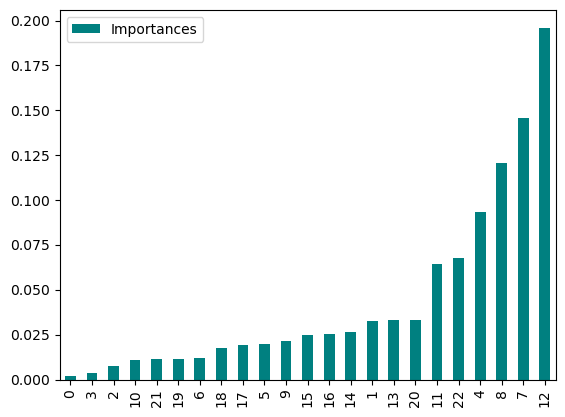

In [86]:
#plot the barchart
finalblue_df.plot.bar(color='teal')

In [87]:
df_red = df.loc[:,[ 'redWins','redFirstBlood', 'redFirstTower', 'redFirstBaron', 'redFirstDragon',
                    'redFirstInhibitor', 'redDragonKills', 'redBaronKills', 'redTowerKills',
                    'redInhibitorKills', 'redWardPlaced', 'redWardkills', 'redKills',
                    'redDeath', 'redAssist', 'redChampionDamageDealt', 'redTotalGold',
                    'redTotalMinionKills', 'redTotalLevel', 'redAvgLevel',
                    'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal','redObjectDamageDealt']]
y_red = df_red['redWins']
X_red = df_red.drop(['redWins'], axis=1)

In [88]:
from sklearn.ensemble import RandomForestClassifier

#calcule MAD
modelB = RandomForestClassifier(n_estimators=340)

modelB.fit(X_red, y_red)

importancesB = modelB.feature_importances_

finalred_df = pd.DataFrame({"Features": X_red.columns, 
                         "Importances":importancesB})
finalred_df.set_index('Importances')

finalred_df = finalred_df.sort_values('Importances')

display(finalred_df)

,Features,Importances
0,redFirstBlood,0.001874
3,redFirstDragon,0.003876
2,redFirstBaron,0.006057
10,redWardkills,0.010202
21,redTotalHeal,0.010482
19,redJungleMinionKills,0.011422
6,redBaronKills,0.011754
18,redAvgLevel,0.016015
17,redTotalLevel,0.017944
9,redWardPlaced,0.020169


<AxesSubplot:>

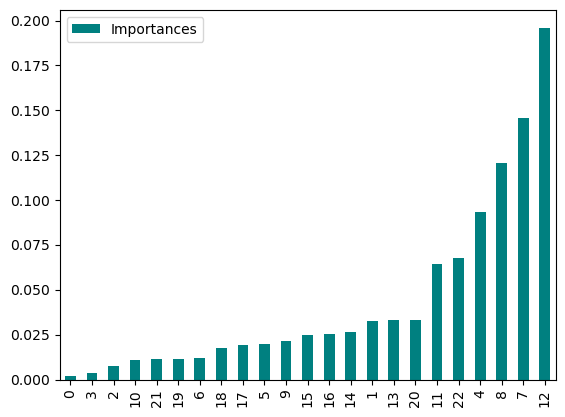

In [89]:
#plot the barchart
finalblue_df.plot.bar(color='teal')

In [ ]:
"""
as expected having first blood red does not affect the red winning game
Conclusion : having first blood doesn't effect on winning game
"""

In [47]:
#2) average game duration
mean_df = df['gameDuration'].mean()
print(mean_df)
#3)The separable dataset is based on winning classification

1448.6536574487066


In [8]:
#QDA
from sklearn.datasets import fetch_olivetti_faces
faces, labels = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" %n_samples)
print("Each face has %d features" % n_features)

Dataset consists of 400 faces
Each face has 4096 features


In [9]:
import numpy as np
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [10]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(
faces, labels,test_size=0.2, random_state=0
)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()

#Fit transform the data
lda.fit(X_train, y_train)

#Print the results
print('************* LDA Summary ***********')
print('Classes: ', lda.classes_)
print('Priors: ', lda.priors_)
print('Explained variance ratio: ', lda.explained_variance_ratio_)

************* LDA Summary ***********
Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Priors:  [0.025    0.01875  0.021875 0.01875  0.028125 0.025    0.025    0.028125
 0.028125 0.015625 0.025    0.025    0.028125 0.01875  0.028125 0.025
 0.028125 0.025    0.03125  0.021875 0.028125 0.028125 0.025    0.021875
 0.025    0.025    0.028125 0.03125  0.025    0.025    0.025    0.021875
 0.021875 0.021875 0.028125 0.03125  0.021875 0.028125 0.01875  0.028125]
Explained variance ratio:  [0.14767816 0.13860414 0.07989917 0.06640291 0.05275537 0.05249145
 0.04783863 0.04336523 0.03847891 0.03082177 0.02677585 0.02517137
 0.02081129 0.01930919 0.01857876 0.0170174  0.01569833 0.0136315
 0.01263814 0.01212862 0.01145361 0.01034241 0.00929372 0.00865851
 0.00849776 0.00810241 0.00733358 0.00701784 0.00612853 0.00604477
 0.00586181 0.00553114 0.00493174 0.00420694 0.00406587 0.00377877
 0.00329526 0.00279689 0.0025

In [15]:
#Exercise
#1)print the accuracy of the LDA, the number of faces in total(in the dataset)
print('Accuracy: ', lda.score(X_test, y_test))

Accuracy:  1.0
Number of faces in the dataset:  400


In [19]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import  train_test_split
qda = QDA()

X_train, X_test, y_train, y_test = train_test_split(faces, labels,test_size=0.2, random_state=0)
#Fit transform the data
qda.fit(X_train, y_train)

#Print the results
print('************* QDA Summary ***********')
print('Classes: ', qda.classes_)
print('Priors: ', qda.priors_)

************* QDA Summary ***********
Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Priors:  [0.025    0.01875  0.021875 0.01875  0.028125 0.025    0.025    0.028125
 0.028125 0.015625 0.025    0.025    0.028125 0.01875  0.028125 0.025
 0.028125 0.025    0.03125  0.021875 0.028125 0.028125 0.025    0.021875
 0.025    0.025    0.028125 0.03125  0.025    0.025    0.025    0.021875
 0.021875 0.021875 0.028125 0.03125  0.021875 0.028125 0.01875  0.028125]


C:\Users\kwass\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [20]:
#Exercise
#1)print the accuracy of the QDA, the number of faces in total(in the test dataset)
print('Accuracy: ', qda.score(X_test, y_test))
print('Number of faces in the dataset: ', faces.shape[0])

Accuracy:  0.125
Number of faces in the dataset:  400
Number of faces with an incorrect prediction


In [94]:
#Exercise with credit card dataset
import pandas as pd
df = pd.read_csv('./data/credit_detection_fraud.csv', delimiter=";")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [95]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [96]:
target = df['Class']
facts = df.drop(columns=['Class'], axis=1)
facts.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [97]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import  train_test_split

#Create the model
model = QDA()

X_train, X_test, y_train, y_test = train_test_split(facts, target, test_size=0.2)
#Fit transform the data
model.fit(X_train, y_train)

#Predict Output(sunny and hot)
y_preds = model.predict(X_test)

In [98]:
print('Accuracy: ', model.score(X_test, y_test))

Accuracy:  0.9758786559460693
